## Model setup XBeach 1D

Setup a 1D XBeach model with the Python toolbox

In [15]:
import numpy as np
from scipy import interpolate
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d, Axes3D 
from matplotlib import cm
import os
import sys

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

Import the toolbox and set the xbeach styleshoot for plotting

In [25]:
## import xbeach tools
sys.path.append(os.path.abspath(os.path.join('lib', 'xbeach-toolbox', 'scripts')))

from xbeachtools import xgrid, ygrid, seaward_extend, XBeachModelSetup, offshore_depth, lateral_extend
plt.style.use(os.path.join('lib', 'xbeach-toolbox', 'scripts', 'xb.mplstyle'))

### Data
Load and plot the bathymetry data

/tmp/ipykernel_1170/1795223721.py:17: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.pcolor(x,y,bathy)
/tmp/ipykernel_1170/1795223721.py:18: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()
/tmp/ipykernel_1170/1795223721.py:24: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax      = Axes3D(fig)


Text(0.5, 0.5, 'y [m]')

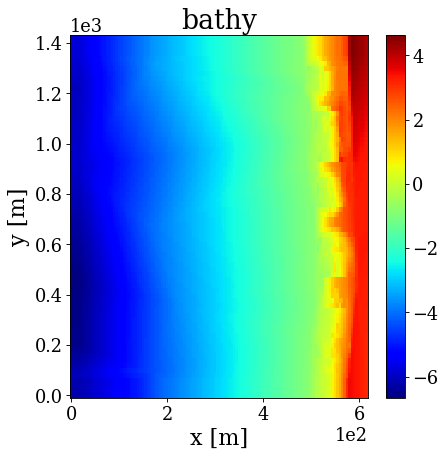

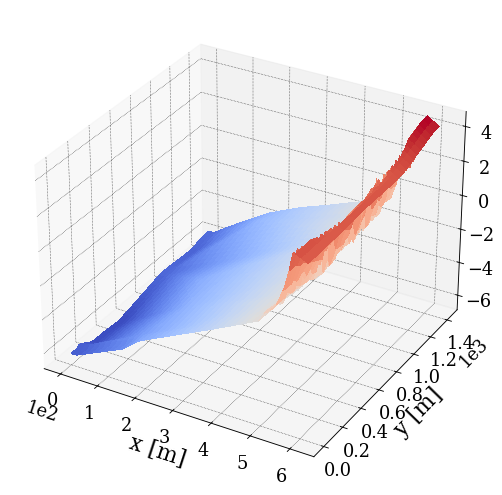

In [44]:
## load data
bathy = np.loadtxt('./lib/xbeach-toolbox/examples/clean/bathy.dep')

## set bathy grid
nx = 124
ny = 72
dx = 5
dy = 20

x = np.linspace(0,(nx-1)*dx,nx)
y = np.linspace(0,(ny-1)*dy,ny)

X, Y = np.meshgrid(x,y)

## plot
plt.figure()
plt.pcolor(x,y,bathy)
plt.colorbar()
plt.xlabel('x [m]')
plt.ylabel('y [m]')
plt.title('bathy')

fig     = plt.figure()
ax      = Axes3D(fig)
surf    = ax.plot_surface(X, Y, bathy, cmap=cm.coolwarm,  linewidth=0, antialiased=False)
plt.xlabel('x [m]')
plt.ylabel('y [m]')

### Create x-grid
Create spatially varying x-grid resolution.

Text(0, 0.5, 'z [m]')

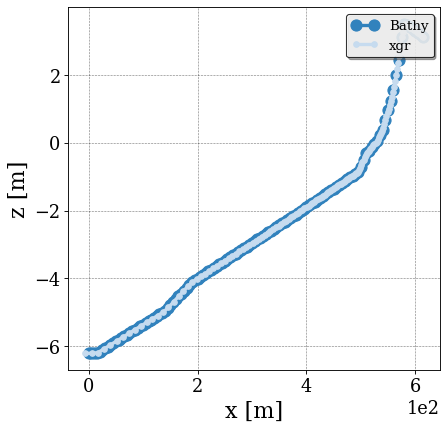

In [18]:
xgr,zgr = xgrid(x, bathy,dxmin=2)


plt.figure()
plt.plot(x,bathy,'-o')
plt.plot(xgr,zgr,'.-')
plt.legend(['Bathy','xgr'])
plt.xlabel('x [m]')
plt.ylabel('z [m]')

### Interpolate
Interpolate data to new grid

Text(0.5, 1.0, 'xb bathy')

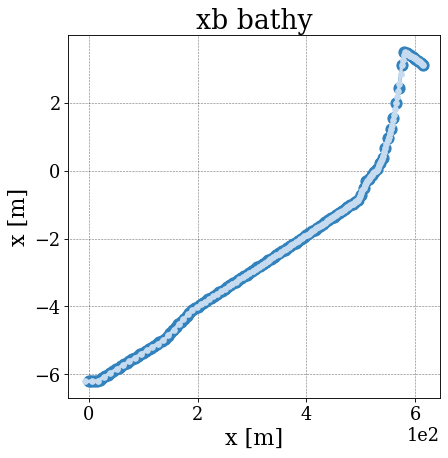

In [19]:
zgr = np.interp(xgr, x, bathy)

plt.figure()
plt.plot(x,bathy,'-o')
plt.plot(xgr,zgr,'.-')
plt.xlabel('x [m]')
plt.ylabel('x [m]')
plt.title('xb bathy')


### Seaward extend
Extend the grid to the required offshore depth. In this case 20 m with a artifial slope of 1/20.

Text(0, 0.5, 'z [m]')

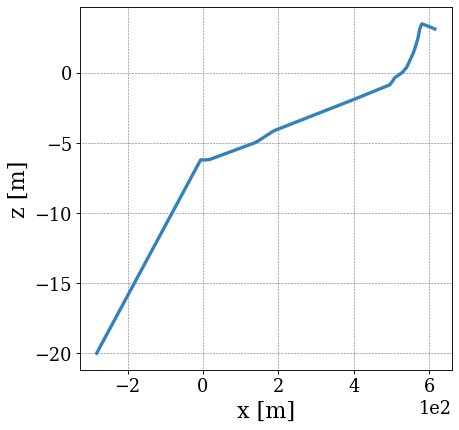

In [20]:
xgr, ygr, zgr = seaward_extend(xgr,[0],zgr,slope=1/20,depth=-20)



plt.figure()
plt.plot(xgr.T,zgr[:,:].T)
plt.xlabel('x [m]')
plt.ylabel('z [m]')


### Create model setup
Create the model setup class

In [21]:
xb_setup = XBeachModelSetup('Test som 2')

print(xb_setup)

Test som 2


Add the grid, wave boundary conditions and parameter to the model

In [22]:
xb_setup.set_grid(xgr,None,zgr)

xb_setup.set_waves('jons',{'Hm0':2,'Tp':5,'gammajsp':3.3, 's' : 10000, 'mainang':270,'fnyq':1})

xb_setup.set_params({'Wavemodel':'surfbeat',
                     'morphology':0,
                     'befriccoef':0.01,
                     'tstop':3600,
                     'nglobalvar':['zb','zs','H'],
                     'nmeanvar':['zb'],
                     'npoints':['1 0', '6 0', '10 0', '12 0']})

Write the model setup

wbctype=jons cannot be plotted


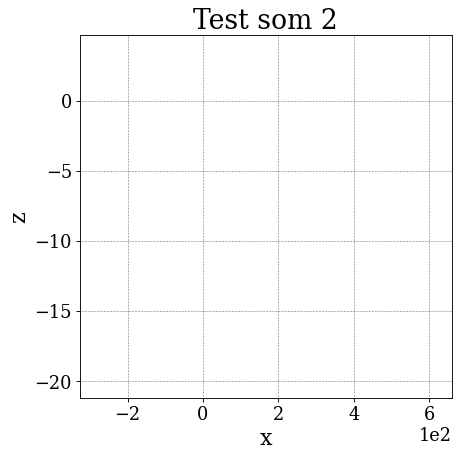

In [26]:
sim_path = os.path.join('output-1D')
if not os.path.exists(sim_path):
    os.mkdir(sim_path)
xb_setup.write_model(sim_path)